![snap](https://lever-client-logos.s3.amazonaws.com/2bd4cdf9-37f2-497f-9096-c2793296a75f-1568844229943.png)

# GetAround 

[GetAround](https://www.getaround.com/?wpsrc=Google+Organic+Search) is the Airbnb for cars. You can rent cars from any person for a few hours to a few days! Founded in 2009, this company has known rapid growth. In 2019, they count over 5 million users and about 20K available cars worldwide. 

As Jedha's partner, they offered this great challenges: 

## Context 

When renting a car, our users have to complete a checkin flow at the beginning of the rental and a checkout flow at the end of the rental in order to:

* Assess the state of the car and notify other parties of pre-existing damages or damages that occurred during the rental.
* Compare fuel levels.
* Measure how many kilometers were driven.

The checkin and checkout of our rentals can be done with three distinct flows:
* **📱 Mobile** rental agreement on native apps: driver and owner meet and both sign the rental agreement on the owner’s smartphone
* **Connect:** the driver doesn’t meet the owner and opens the car with his smartphone
* **📝 Paper** contract (negligible)

## Project 🚧

For this case study, we suggest that you put yourselves in our shoes, and run an analysis we made back in 2017 🔮 🪄

When using Getaround, drivers book cars for a specific time period, from an hour to a few days long. They are supposed to bring back the car on time, but it happens from time to time that drivers are late for the checkout.

Late returns at checkout can generate high friction for the next driver if the car was supposed to be rented again on the same day : Customer service often reports users unsatisfied because they had to wait for the car to come back from the previous rental or users that even had to cancel their rental because the car wasn’t returned on time.


## Goals 🎯

In order to mitigate those issues we’ve decided to implement a minimum delay between two rentals. A car won’t be displayed in the search results if the requested checkin or checkout times are too close from an already booked rental.

It solves the late checkout issue but also potentially hurts Getaround/owners revenues: we need to find the right trade off.

**Our Product Manager still needs to decide:**
* **threshold:** how long should the minimum delay be?
* **scope:** should we enable the feature for all cars?, only Connect cars?

In order to help them make the right decision, they are asking you for some data insights. Here are the first analyses they could think of, to kickstart the discussion. Don’t hesitate to perform additional analysis that you find relevant.

* Which share of our owner’s revenue would potentially be affected by the feature?
* How many rentals would be affected by the feature depending on the threshold and scope we choose?
* How often are drivers late for the next check-in? How does it impact the next driver?
* How many problematic cases will it solve depending on the chosen threshold and scope?

### Web dashboard

First build a dashboard that will help the product Management team with the above questions. You can use `streamlit` or any other technology that you see fit. 


### Machine Learning - `/predict` endpoint

In addition to the above question, the Data Science team is working on *pricing optimization*. They have gathered some data to suggest optimum prices for car owners using Machine Learning. 

You should provide at least **one endpoint** `/predict`. The full URL would look like something like this: `https://your-url.com/predict`.

This endpoint accepts **POST method** with JSON input data and it should return the predictions. We assume **inputs will be always well formatted**. It means you do not have to manage errors. We leave the error handling as a bonus.

Input example:

```
{
  "input": [[7.0, 0.27, 0.36, 20.7, 0.045, 45.0, 170.0, 1.001, 3.0, 0.45, 8.8], [7.0, 0.27, 0.36, 20.7, 0.045, 45.0, 170.0, 1.001, 3.0, 0.45, 8.8]]
}
```

The response should be a JSON with one key `prediction` corresponding to the prediction.

Response example:

```
{
  "prediction":[6,6]
}
```

### Documentation page

You need to provide the users with a **documentation** about your API.

It has to be located at the `/docs` of your website. If we take the URL example above, it should be located directly at `https://your-url.com/docs`).

This small documentation should at least include:
- An h1 title: the title is up to you.
- A description of every endpoints the user can call with the endpoint name, the HTTP method, the required input and the expected output (you can give example).

You are free to add other any other relevant informations and style your HTML as you wish.

### Online production

You have to **host your API online**. We recommend you to use [Heroku](https://www.heroku.com/) as it is free of charge. But you are free to choose any other hosting provider.

## Helpers 🦮

To help you start with this project we provide you with some pieces of advice:

* Spend some time understanding data 
* Don't overlook Data Analysis part, there is a lot of insights to find out. 
* Data Analysis should take 2 to 5 hours 
* Machine Learning should take 3 to 6 hours 
* You are not obligated to use libraries to handle your Machine Learning workflow like `mlflow` but we definitely advise you to do so.


### Share your code

In order to get evaluation, do not forget to share your code on a [Github](https://github.com/) repository. You can create a [`README.md`](https://guides.github.com/features/mastering-markdown/) file with a quick description about this project, how to setup locally and the online URL.

## Deliverable 📬

To complete this project, you should deliver:

- A **dashboard** in production (accessible via a web page for example)
- The **whole code** stored in a **Github repository**. You will include the repository's URL.
- An **documented online API** on Heroku server (or any other provider you choose) containing at least **one `/predict` endpoint** that respects the technical description above. We should be able to request the API endpoint `/predict` using `curl`:

```shell
$ curl -i -H "Content-Type: application/json" -X POST -d '{"input": [[7.0, 0.27, 0.36, 20.7, 0.045, 45.0, 170.0, 1.001, 3.0, 0.45, 8.8]]}' http://your-url/predict
```

Or Python:

```python
import requests

response = requests.post("https://your-url/predict", json={
    "input": [[7.0, 0.27, 0.36, 20.7, 0.045, 45.0, 170.0, 1.001, 3.0, 0.45, 8.8]]
})
print(response.json())
```

## Data 

There are two files you need to download: 

* [Delay Analysis](https://full-stack-assets.s3.eu-west-3.amazonaws.com/Deployment/get_around_delay_analysis.xlsx) 👈 Data Analysis 
* [Pricing Optimization](https://full-stack-assets.s3.eu-west-3.amazonaws.com/Deployment/get_around_pricing_project.csv) 👈 Machine Learning 


Happy coding! 👩‍💻

#   Plan

1. Introduction
2. Importing Libraries
3. Importing Data
4. Exploration
5. Web Dashboard EDA
4. Conclusion


#   Introduction

## Context and Challenge
The seamless rental experience at Getaround is occasionally hindered by late returns during checkout, causing inconvenience for subsequent renters. This issue not only strains customer relations but also poses a logistical challenge, especially when cars are booked back-to-back. In response, Getaround is contemplating the introduction of a mandatory delay between rentals to mitigate these late returns, thereby ensuring a smoother transition between users. However, this solution must be balanced against potential revenue impacts and operational feasibility.

## Project Goals and Objectives
The primary objective of this analysis is to provide data-driven insights to assist Getaround's Product Management team in making informed decisions regarding:

### Threshold: Determining the optimal duration of the minimum delay between rentals.
### Scope: Deciding whether to apply this policy universally or limit it to specific rental categories, such as Connect cars.
To achieve these objectives, our analysis will focus on:

- Assessing the potential impact of the minimum delay feature on owner revenue.
- Estimating the number of rentals and users affected by various threshold and scope implementations.
- Analyzing the frequency and implications of late returns on subsequent rentals.
- Evaluating the effectiveness of different thresholds and scopes in resolving identified issues.


#  Importing Libraries

In [9]:
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from streamlit_jupyter import StreamlitPatcher, tqdm

StreamlitPatcher().jupyter()  # register streamlit with jupyter-compatible wrappers

#  Importing Data

In [10]:
#Importing the file on delay analysis
pathfile = 'Data/get_around_delay_analysis.xlsx'
df = pd.read_excel(pathfile)

In [11]:
df.head()

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN


##  Exploration

In [12]:
"""Depiction of dataset variables and statistics"""
#Dataset information
print('Dataset information')
print(df.info())
#Top 5 rows of dataset
display('Dataset:', df.head())
print('General statistics of the dataset:')
display(df.describe(include='all'))
print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])
print()
print('Missing values for each variable')
display(df.isnull().sum())
print('percentage of missing value')
display(df.isna().sum() / (df.isna().sum() + df.count()) * 100)

Dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21310 entries, 0 to 21309
Data columns (total 7 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rental_id                                   21310 non-null  int64  
 1   car_id                                      21310 non-null  int64  
 2   checkin_type                                21310 non-null  object 
 3   state                                       21310 non-null  object 
 4   delay_at_checkout_in_minutes                16346 non-null  float64
 5   previous_ended_rental_id                    1841 non-null   float64
 6   time_delta_with_previous_rental_in_minutes  1841 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.1+ MB
None


'Dataset:'

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN


General statistics of the dataset:


,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
count,21310.000000,21310.000000,21310,21310,16346.000000,1841.000000,1841.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN
top,NaN,NaN,mobile,ended,NaN,NaN,NaN
freq,NaN,NaN,17003,18045,NaN,NaN,NaN
mean,549712.880338,350030.603426,NaN,NaN,59.701517,550127.411733,279.288430
std,13863.446964,58206.249765,NaN,NaN,1002.561635,13184.023111,254.594486
min,504806.000000,159250.000000,NaN,NaN,-22433.000000,505628.000000,0.000000
25%,540613.250000,317639.000000,NaN,NaN,-36.000000,540896.000000,60.000000
50%,550350.000000,368717.000000,NaN,NaN,9.000000,550567.000000,180.000000
75%,560468.500000,394928.000000,NaN,NaN,67.000000,560823.000000,540.000000


Number of rows: 21310
Number of columns: 7

Missing values for each variable


rental_id                                         0
car_id                                            0
checkin_type                                      0
state                                             0
delay_at_checkout_in_minutes                   4964
previous_ended_rental_id                      19469
time_delta_with_previous_rental_in_minutes    19469
dtype: int64

percentage of missing value


rental_id                                      0.000000
car_id                                         0.000000
checkin_type                                   0.000000
state                                          0.000000
delay_at_checkout_in_minutes                  23.294228
previous_ended_rental_id                      91.360863
time_delta_with_previous_rental_in_minutes    91.360863
dtype: float64

# Web Dashboard

In [3]:
# Function to load data
@st.cache_data
def load_data():
    return pd.read_excel('Data/get_around_delay_analysis.xlsx')

# Load the data
df = load_data()

2024-02-04 20:53:51.468 No runtime found, using MemoryCacheStorageManager


In [ ]:
# We can see that the column checkout contain None values
# We will replace them by 0
df['delay_at_checkout_in_minutes'] = df['delay_at_checkout_in_minutes'].fillna(0)

In [8]:
# Title of the app
st.title('Getaround Delay Analysis')

# Getaround Delay Analysis

In [6]:
# Show columns names
st.subheader('Columns names')
st.write(df.columns)

### Columns names

Index(['rental_id', 'car_id', 'checkin_type', 'state',
       'delay_at_checkout_in_minutes', 'previous_ended_rental_id',
       'time_delta_with_previous_rental_in_minutes'],
      dtype='object')

In [7]:
# Show data types
st.subheader('Data types')
st.write(df.dtypes)

### Data types

rental_id                                       int64
car_id                                          int64
checkin_type                                   object
state                                          object
delay_at_checkout_in_minutes                  float64
previous_ended_rental_id                      float64
time_delta_with_previous_rental_in_minutes    float64
dtype: object

In [9]:
# Show shape of the data
st.subheader('Shape of the data')
st.write(df.shape)

### Shape of the data

(21310, 7)

In [10]:
# Show summary of the data
st.subheader('Summary of the data')
st.write(df.describe())

### Summary of the data

,rental_id,car_id,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
count,21310.000000,21310.000000,16346.000000,1841.000000,1841.000000
mean,549712.880338,350030.603426,59.701517,550127.411733,279.288430
std,13863.446964,58206.249765,1002.561635,13184.023111,254.594486
min,504806.000000,159250.000000,-22433.000000,505628.000000,0.000000
25%,540613.250000,317639.000000,-36.000000,540896.000000,60.000000
50%,550350.000000,368717.000000,9.000000,550567.000000,180.000000
75%,560468.500000,394928.000000,67.000000,560823.000000,540.000000
max,576401.000000,417675.000000,71084.000000,575053.000000,720.000000


In [12]:
# Create a section
st.subheader('Exploration')

# Description of the data
st.write('The data contains information about the rentals of Getaround in Paris between 2019-01-01 and 2020-12-31.')

### Exploration

The data contains information about the rentals of Getaround in Paris between 2019-01-01 and 2020-12-31.

### Number of Rentals by State

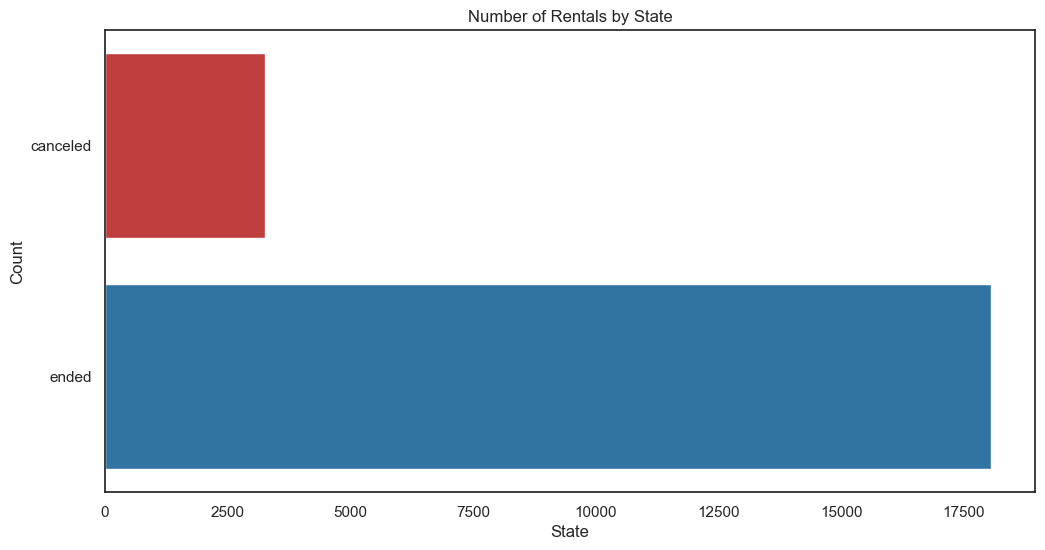

The number of rentals that have been canceled is very low compared to the number of rentals that have ended. We will focus on rentals that have ended.

Number of rentals that have ended: 18045

In [36]:
# Show the number of rentals by state
def plot_rental_by_state(data):
    # Define a color map for the states
    state_colors = {"canceled": "#d62728", "ended": "#1f77b4"}
    
    # Ensure sns.set() or sns.set_palette() is called outside the function to apply globally
    sns.set_theme(style="white")  # Optional: sets the Seaborn theme
    
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Use the 'palette' parameter to assign specific colors based on 'state' values
    sns.countplot(y='state', data=data, palette=state_colors, orient='v', ax=ax)
    
    ax.set_title('Number of Rentals by State')
    ax.set_xlabel('State')
    ax.set_ylabel('Count')
    return fig

st.subheader('Number of Rentals by State')
plt.show(plot_rental_by_state(df))
# Comment
st.write('The number of rentals that have been canceled is very low compared to the number of rentals that have ended. We will focus on rentals that have ended.')

# Now taking only rentals that have ended
df_ended = df[df.state == 'ended']
st.write('Number of rentals that have ended: {}'.format(df_ended.shape[0]))

# Create a new categorical column for late rentals in 'On time' and 'Late'
df['is_late'] = df['delay_at_checkout_in_minutes'].apply(lambda x: 'Late' if x > 0 else 'On time')

### Number of Rentals by Check-in Type

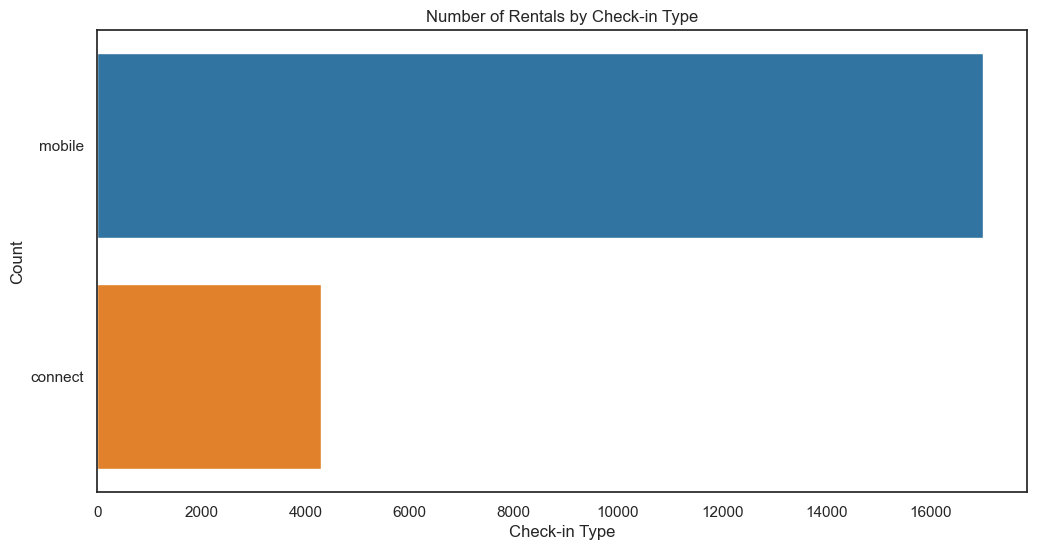

The number of rentals with a mobile check-in is much higher than the number of rentals with a connect check-in.

In [38]:
# Show the number of rentals by checkin type
def plot_rental_by_checkin_type(data):
    # Set the color palette
    checkin_type_colors = ['#1f77b4', '#ff7f0e']  # Blue and orange for different check-in types
    
    sns.set_theme(style="white")  # Sets the Seaborn theme
    
    fig, ax = plt.subplots(figsize=(12, 6))
    # Plot with specified colors for check-in types
    sns.countplot(y='checkin_type', data=data, palette=checkin_type_colors, ax=ax)
    
    ax.set_title('Number of Rentals by Check-in Type')
    ax.set_xlabel('Check-in Type')
    ax.set_ylabel('Count')
    return fig

st.subheader('Number of Rentals by Check-in Type')
plt.show(plot_rental_by_checkin_type(df))

# Comment
st.write('The number of rentals with a mobile check-in is much higher than the number of rentals with a connect check-in.')

### Number of Late Rentals by Check-in Type

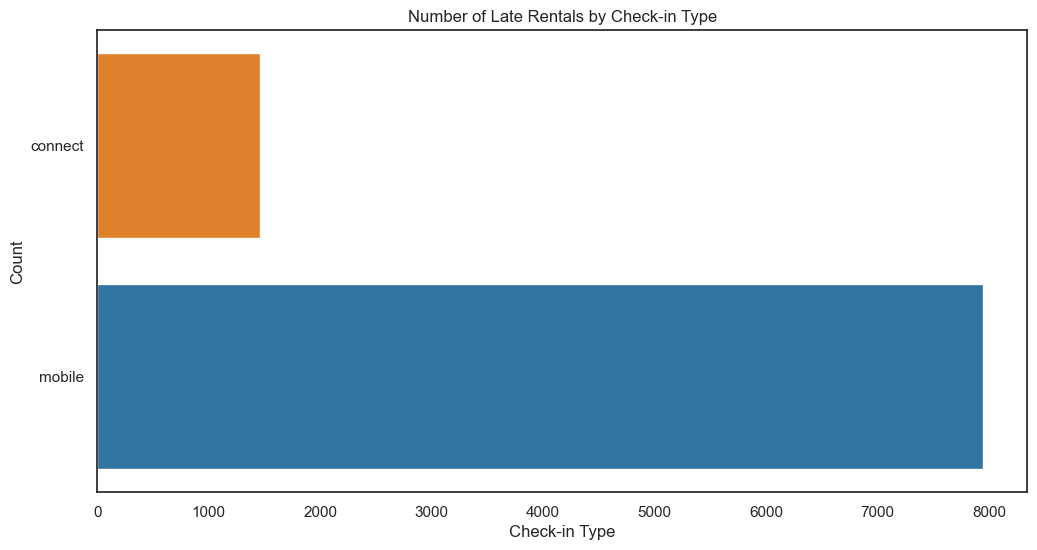

In [39]:
# Show the number of late rentals by checkin type
def plot_late_rental_by_checkin_type(data):
    # Set the color palette
    checkin_type_colors = ['#ff7f0e', '#1f77b4']  # Blue and orange for different check-in types
    
    
    
    sns.set_theme(style="white")  # Sets the Seaborn theme
    
    fig, ax = plt.subplots(figsize=(12, 6))
    # Plot with specified colors for checkin types
    sns.countplot(y='checkin_type', data=data, palette=checkin_type_colors, ax=ax)
    
    ax.set_title('Number of Late Rentals by Check-in Type')
    ax.set_xlabel('Check-in Type')
    ax.set_ylabel('Count')
    return fig

st.subheader('Number of Late Rentals by Check-in Type')
plt.show(plot_late_rental_by_checkin_type(df_ended[df_ended['delay_at_checkout_in_minutes'] > 0]))

In [16]:
# Calculate the number of rentals, late rentals, and share of late rentals for each check-in type
number_of_rentals_mobile = df_ended[df_ended['checkin_type'] == 'mobile'].shape[0]
number_of_late_rentals_mobile = df_ended[(df_ended['checkin_type'] == 'mobile') & (df_ended['delay_at_checkout_in_minutes'] > 0)].shape[0]
share_of_late_rentals_mobile = number_of_late_rentals_mobile / number_of_rentals_mobile *100

number_of_rentals_connect = df_ended[df_ended['checkin_type'] == 'connect'].shape[0]
number_of_late_rentals_connect = df_ended[(df_ended['checkin_type'] == 'connect') & (df_ended['delay_at_checkout_in_minutes'] > 0)].shape[0]
share_of_late_rentals_connect = number_of_late_rentals_connect / number_of_rentals_connect *100

# Dataframe with numeric data, the number of rentals that ended, the number of late rentals and the share of late rentals
df_summary = pd.DataFrame({
    'number_of_rentals': [df_ended.shape[0], df_ended[df_ended['delay_at_checkout_in_minutes'] > 0].shape[0], df_ended[df_ended['delay_at_checkout_in_minutes'] > 0].shape[0] / df_ended.shape[0] * 100],
    'mobile': [number_of_rentals_mobile, number_of_late_rentals_mobile, share_of_late_rentals_mobile],
    'connect': [number_of_rentals_connect, number_of_late_rentals_connect, share_of_late_rentals_connect]
}, index=['Total', 'Late', 'Share of Late Rentals (%)'])

# Show the summary
st.subheader('Summary')
st.write(df_summary)

# Comment
st.write('The share of late rentals is 52\% of all rentals, this is a major issue.')

### Summary

,number_of_rentals,mobile,connect
Total,18045.000000,14536.000000,3509.000000
Late,9404.000000,7945.000000,1459.000000
Share of Late Rentals (%),52.114159,54.657402,41.578797


The share of late rentals is 52\% of all rentals, this is a major issue.

C:\Users\morab\AppData\Local\Temp\ipykernel_23204\4276958069.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ended['checkin_type'] = df_ended['checkin_type'].astype('category')
C:\Users\morab\AppData\Local\Temp\ipykernel_23204\4276958069.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ended['state'] = df_ended['state'].astype('category')


### Delay at Checkout by Check-in Type

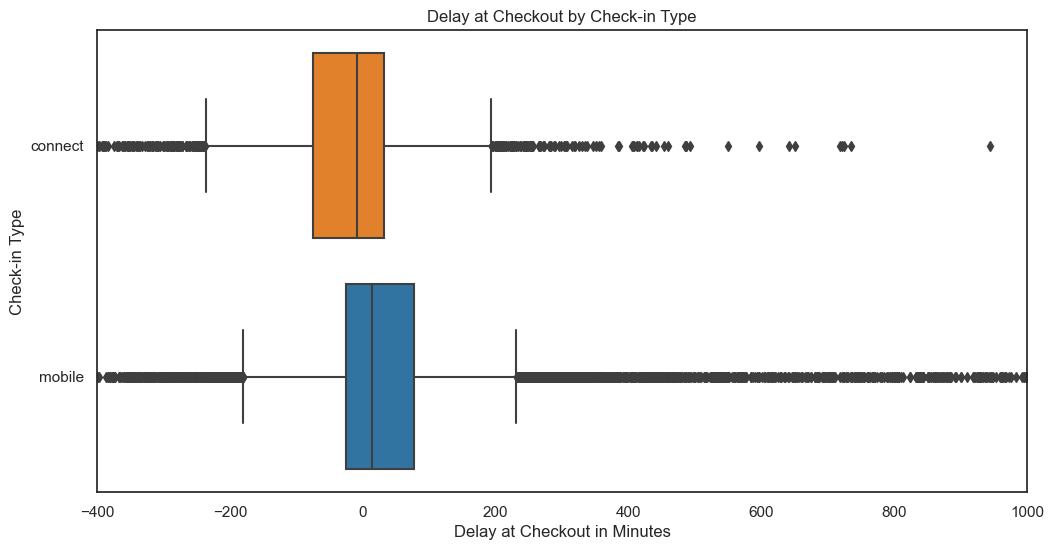

The median delay at checkout is higher for mobile check-in than for connect check-in, the delays are also more pronounced.

In [40]:
# Change column checkin_type to categorical
df_ended['checkin_type'] = df_ended['checkin_type'].astype('category')

# Change colum state to categorical
df_ended['state'] = df_ended['state'].astype('category')

# Show interactions between columns
# hue = 'checkin_type' to show the interactions between checkin_type and other columns
#PLot interactions between delay_at_checkout_in_minutes and checkin_type
def plot_delay_by_checkin_type(data):
    # Set the color palette
    checkin_type_colors = ['#ff7f0e', '#1f77b4']  # Blue and orange for different check-in types
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.boxplot(x='delay_at_checkout_in_minutes', y='checkin_type', data=data, ax=ax, whis=1.5, palette=checkin_type_colors)
    ax.set_title('Delay at Checkout by Check-in Type')
    ax.set_xlabel('Delay at Checkout in Minutes')
    ax.set_ylabel('Check-in Type')
    ax.set_xlim(-400, 1000)
    return fig


st.subheader('Delay at Checkout by Check-in Type')
plt.show(plot_delay_by_checkin_type(df_ended))

# Comment
st.write('The median delay at checkout is higher for mobile check-in than for connect check-in, the delays are also more pronounced.')

### Share of Rentals Late at Checkout by Check-in Type

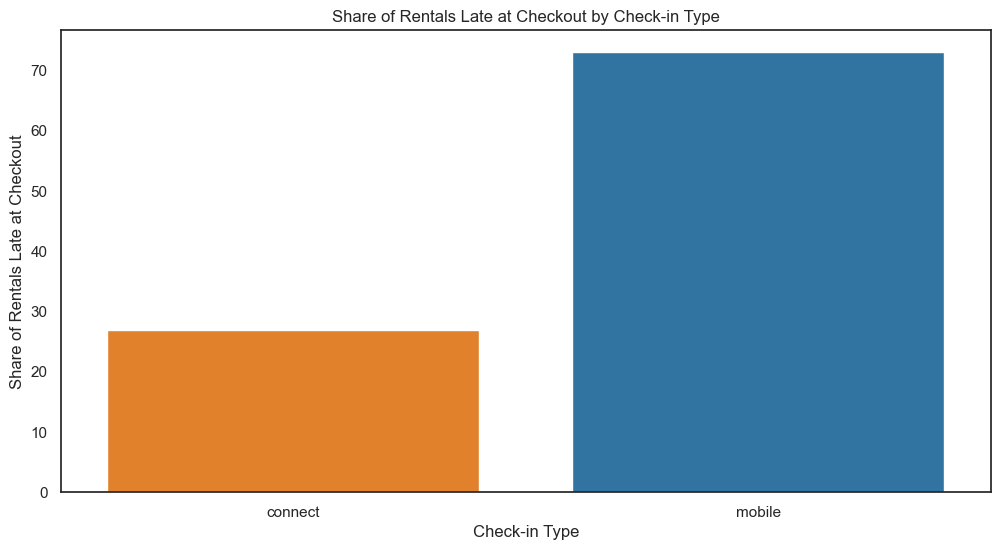

In [49]:
# Add a late window
late_window = 180 # Default value

# Filter the data based on the selected late window
df_late = df_ended[(df_ended['delay_at_checkout_in_minutes'] > - late_window) & (df_ended['delay_at_checkout_in_minutes'] < 0)]

# Share of rentals late at checkout by checkin type
def plot_share_of_late_rentals_by_checkin_type(data):
    # Set the color palette
    checkin_type_colors = ['#ff7f0e', '#1f77b4']  # Blue and orange for different check-in types
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.barplot(x='checkin_type', y='delay_at_checkout_in_minutes', data=data, ax=ax, estimator=lambda x: len(x) / len(data) * 100, palette=checkin_type_colors)
    ax.set_title('Share of Rentals Late at Checkout by Check-in Type')
    ax.set_xlabel('Check-in Type')
    ax.set_ylabel('Share of Rentals Late at Checkout')
    return fig

st.subheader('Share of Rentals Late at Checkout by Check-in Type')
plt.show(plot_share_of_late_rentals_by_checkin_type(df_late))

Number of rentals late at checkout for connect: 1325 (7.3%)

Number of rentals late at checkout for mobile: 3779 (20.9%)

### Number of Rentals Late at Checkout by Late Window

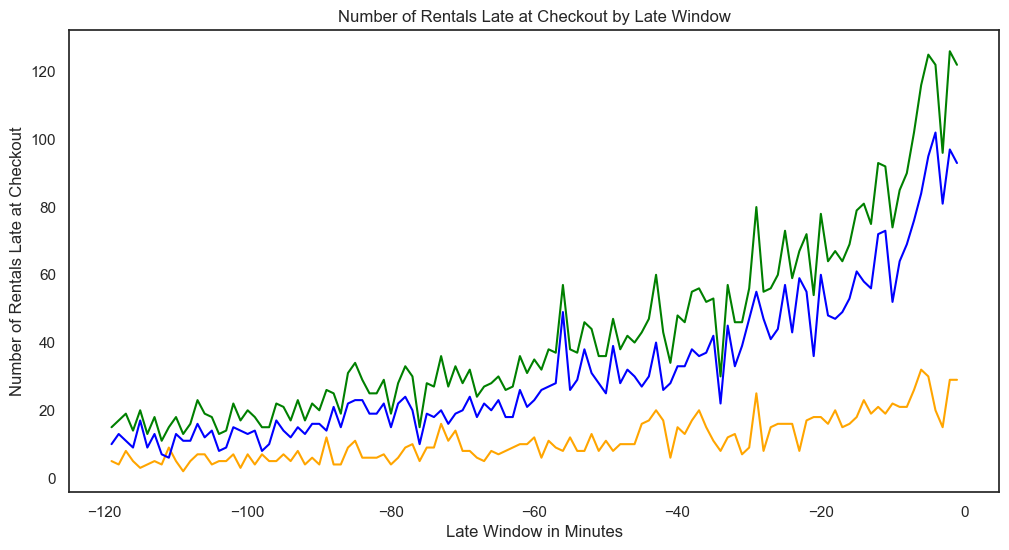

The number of rentals late at checkout decreases with the late window. The number of rentals late at checkout for connect is higher than for mobile.

In [42]:
# Calculate the number of rentals late at checkout for each check-in type using the filtered data
number_of_late_rentals_by_checkin_type = df_late.groupby('checkin_type').size()

# Share in percent
number_of_late_rentals_by_checkin_type_percent = number_of_late_rentals_by_checkin_type / df_ended.shape[0] * 100

st.write('Number of rentals late at checkout for connect: {} ({:,.1f}%)'.format(number_of_late_rentals_by_checkin_type['connect'], number_of_late_rentals_by_checkin_type_percent['connect']))
st.write('Number of rentals late at checkout for mobile: {} ({:,.1f}%)'.format(number_of_late_rentals_by_checkin_type['mobile'], number_of_late_rentals_by_checkin_type_percent['mobile']))

# Plot the relation between the number of rentals late at checkout total, and by checkin type and the late window
def plot_number_of_late_rentals_by_late_window(data):
    # Prepare data for 'connect' checkin_type
    data_late = data.groupby('delay_at_checkout_in_minutes').size().reset_index().rename(columns={0: 'number_of_late_rentals'})
    data_connect = data[data['checkin_type'] == 'connect'].groupby('delay_at_checkout_in_minutes').size().reset_index().rename(columns={0: 'number_of_late_rentals_connect'})
    data_mobile = data[data['checkin_type'] == 'mobile'].groupby('delay_at_checkout_in_minutes').size().reset_index().rename(columns={0: 'number_of_late_rentals_mobile'})
    
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.lineplot(x='delay_at_checkout_in_minutes', y='number_of_late_rentals', data=data_late, ax=ax, color='green')
    sns.lineplot(x='delay_at_checkout_in_minutes', y='number_of_late_rentals_connect', data=data_connect, ax=ax, color='orange')
    sns.lineplot(x='delay_at_checkout_in_minutes', y='number_of_late_rentals_mobile', data=data_mobile, ax=ax, color='blue')
    ax.set_title('Number of Rentals Late at Checkout by Late Window')
    ax.set_xlabel('Late Window in Minutes')
    ax.set_ylabel('Number of Rentals Late at Checkout')
    return fig

st.subheader('Number of Rentals Late at Checkout by Late Window')
plt.show(plot_number_of_late_rentals_by_late_window(df_late))

# Comment
st.write('The number of rentals late at checkout decreases with the late window. The number of rentals late at checkout for connect is higher than for mobile.')

### Data Analysis

C:\Users\morab\AppData\Local\Temp\ipykernel_23204\3625294398.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ended['delay_between_rentals_in_minutes'] = df_ended['time_delta_with_previous_rental_in_minutes'] - df_ended['delay_at_checkout_in_minutes']


### Distribution of Delay Between Rentals

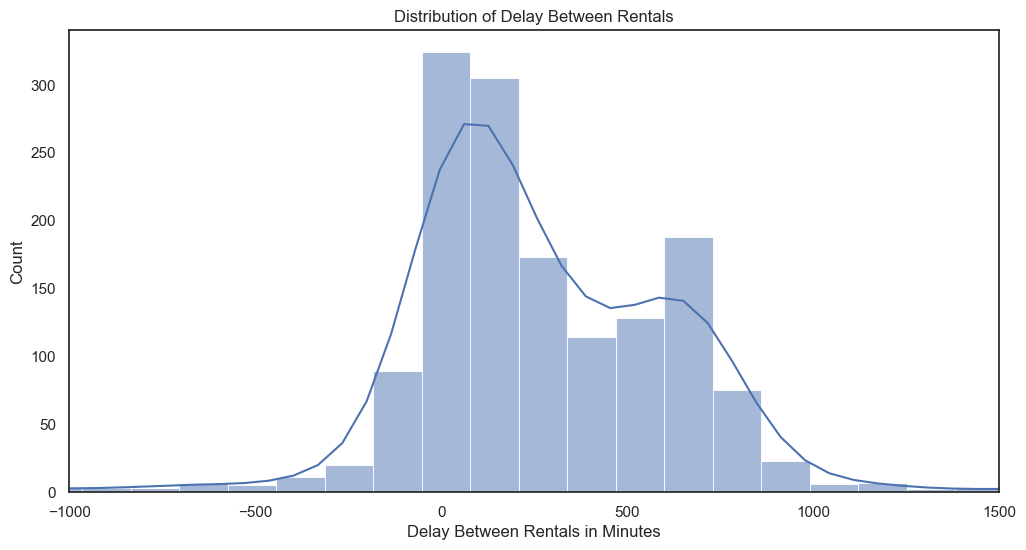

The distribution of the delay between rentals is right skewed, the negatives are rentals where the primary person was late to return the car. There are two peaks, the most important is around 0, and it represents the rentals that are slightly late or just on time, this is the element we can act on. The second peak represents the rentals that are on time.

In [43]:
# Create a section
st.subheader('Data Analysis')

# Finding an optimal delay between rentals
# Create a new column with the delay between rentals
df_ended['delay_between_rentals_in_minutes'] = df_ended['time_delta_with_previous_rental_in_minutes'] - df_ended['delay_at_checkout_in_minutes']

# Plot the distribution of the delay between rentals
def plot_delay_between_rentals(data):
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.histplot(data['delay_between_rentals_in_minutes'], bins=100, kde=True, ax=ax)
    ax.set_title('Distribution of Delay Between Rentals')
    ax.set_xlabel('Delay Between Rentals in Minutes')
    ax.set_ylabel('Count')
    # Add xlim
    ax.set_xlim(-1000, 1500)
    return fig

st.subheader('Distribution of Delay Between Rentals')
plt.show(plot_delay_between_rentals(df_ended))

# Comment
st.write('The distribution of the delay between rentals is right skewed, the negatives are rentals where the primary person was late to return the car. There are two peaks, the most important is around 0, and it represents the rentals that are slightly late or just on time, this is the element we can act on. The second peak represents the rentals that are on time.')


### Delay Between Rentals by Check-in Type

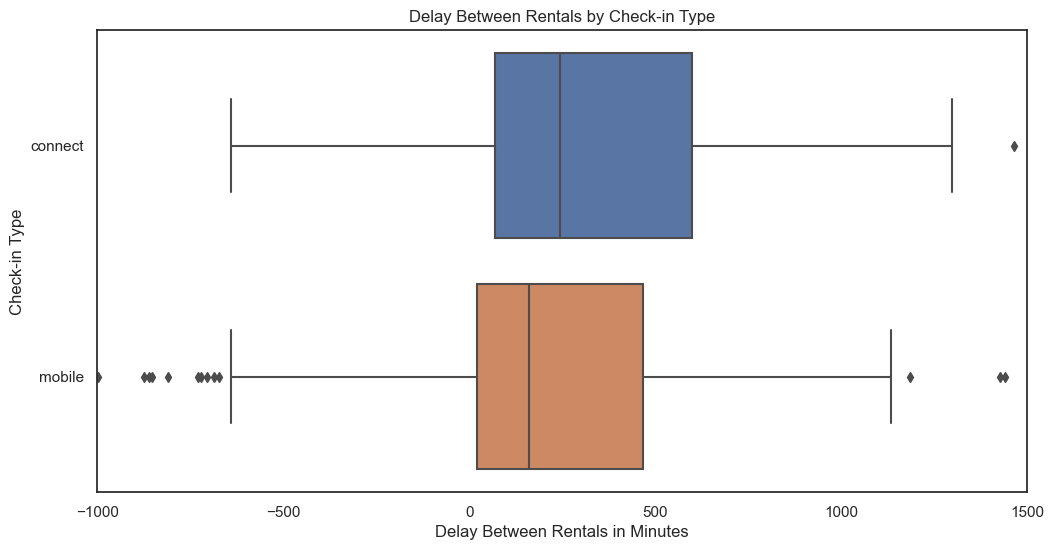

The delay for mobile rentals are close to 0 which means that the primary person is on time or slightly late.

In [44]:
# Plot the distribution of the delay between rentals by checkin type
def plot_delay_between_rentals_by_checkin_type(data):
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.boxplot(x='delay_between_rentals_in_minutes', y='checkin_type', data=data, ax=ax, whis=1.5)
    ax.set_title('Delay Between Rentals by Check-in Type')
    ax.set_xlabel('Delay Between Rentals in Minutes')
    ax.set_ylabel('Check-in Type')
    ax.set_xlim(-1000, 1500)
    return fig

st.subheader('Delay Between Rentals by Check-in Type')
plt.show(plot_delay_between_rentals_by_checkin_type(df_ended))

# Comment
st.write('The delay for mobile rentals are close to 0 which means that the primary person is on time or slightly late.')

### Distribution of Delay Between Rentals with Min Delay

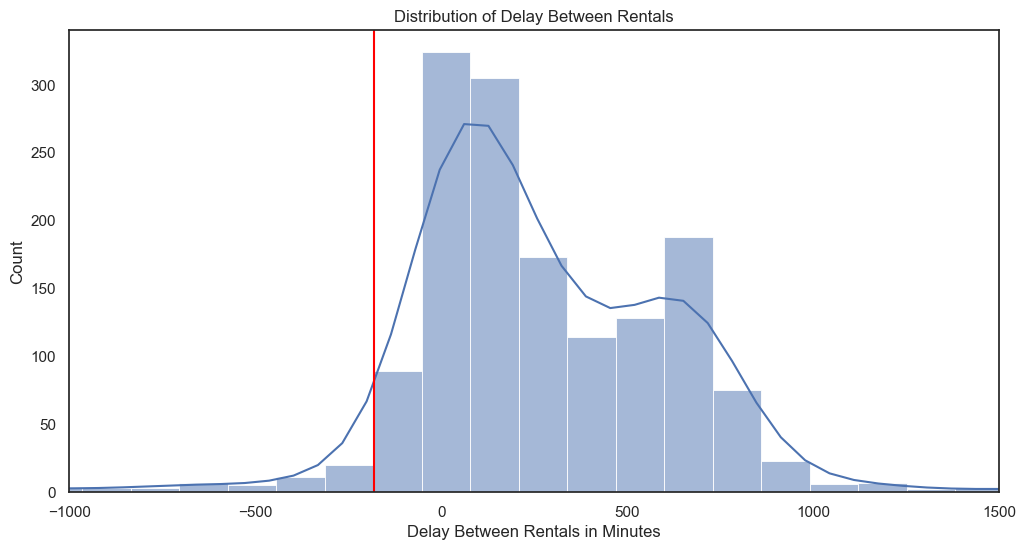

The application of the delay is shown by a red vertical line, further left than the line, these cases will be difficult to avoid, the first peak we mentionned before now will be included in the on time return due to the delay.

In [45]:
# How does max delay affect the number of rentals?
# Plot delay between rentals with a slider for max delay
def plot_delay_between_rentals_with_max_delay(data, min_delay):
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.histplot(data['delay_between_rentals_in_minutes'], bins=100, kde=True, ax=ax)
    # vertical line for min delay
    ax.axvline(- min_delay, color='red')
    ax.set_title('Distribution of Delay Between Rentals')
    ax.set_xlabel('Delay Between Rentals in Minutes')
    ax.set_ylabel('Count')
    # Add xlim
    ax.set_xlim(-1000, 1500)
    return fig

st.subheader('Distribution of Delay Between Rentals with Min Delay')
min_delay = st.slider('Min Delay', 0, 1000, 180)
plt.show(plot_delay_between_rentals_with_max_delay(df_ended, min_delay))

# Comment
st.write('The application of the delay is shown by a red vertical line, further left than the line, these cases will be difficult to avoid, the first peak we mentionned before now will be included in the on time return due to the delay.')


### Distribution of Delay at Checkout with Min Delay

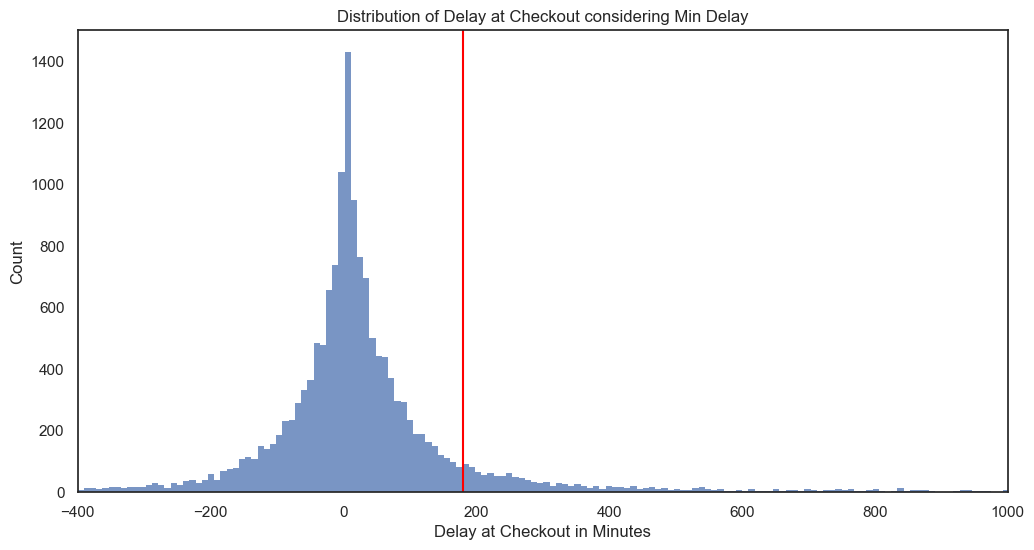

The distribution of the delay at checkout shows negative what is in advance or on time, and positive what is late. The red vertical line shows the min delay, the rentals that are late but less than the min delay will be considered on time.

In [46]:
# Distribution of delay at checkout depending on the min delay
def plot_delay_at_checkout_with_max_delay(data):
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.histplot(data['delay_at_checkout_in_minutes'], bins=10000, kde=False, ax=ax)
    ax.set_title('Distribution of Delay at Checkout considering Min Delay')
    ax.set_xlabel('Delay at Checkout in Minutes')
    ax.set_ylabel('Count')
    # vertical line for min delay
    ax.axvline( min_delay, color='red')
    # Add xlim
    ax.set_xlim(-400, 1000)
    return fig

st.subheader('Distribution of Delay at Checkout with Min Delay')
plt.show(plot_delay_at_checkout_with_max_delay(df_ended))

# Comment
st.write('The distribution of the delay at checkout shows negative what is in advance or on time, and positive what is late. The red vertical line shows the min delay, the rentals that are late but less than the min delay will be considered on time.')


Total number of rentals that ended: 18045

Affected rentals by min delay: 7638

### Share of Affected Rentals

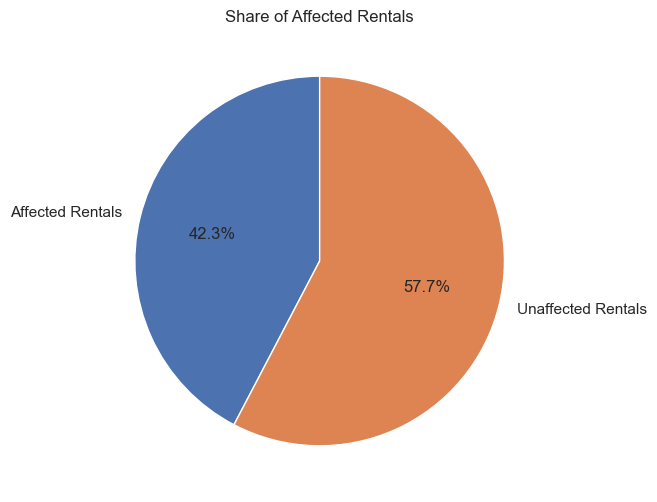

The share of affected rentals is 42.3"%" of all rentals for a delay of 180 minutes, the implications are quite high.

In [47]:
# Which share of our owner’s revenue would potentially be affected by the feature?
# Total number of rentals that ended
total_number_of_rentals = df_ended.shape[0]
st.write('Total number of rentals that ended: {}'.format(total_number_of_rentals))
# Affected rentals by min delay
affected_rentals = df_ended[(df_ended['delay_at_checkout_in_minutes'] > 0 ) & (df_ended['delay_at_checkout_in_minutes'] < min_delay)].shape[0]
st.write('Affected rentals by min delay: {}'.format(affected_rentals))
# Share of affected rentals
share_of_affected_rentals = affected_rentals / total_number_of_rentals
# Share of unaffected rentals
share_of_unaffected_rentals = 1 - share_of_affected_rentals
# Pie plot
def plot_share_of_affected_rentals(data):
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.pie([share_of_affected_rentals, share_of_unaffected_rentals], labels=['Affected Rentals', 'Unaffected Rentals'], autopct='%1.1f%%', startangle=90)
    ax.set_title('Share of Affected Rentals')
    return fig

st.subheader('Share of Affected Rentals')
plt.show(plot_share_of_affected_rentals(df_ended))

# Comment
st.write('The share of affected rentals is 42.3"%" of all rentals for a delay of 180 minutes, the implications are quite high.')

In [26]:
# Calculate the number of rentals, late rentals, and share of late rentals for each check-in type
number_of_rentals_mobile = df_ended[df_ended['checkin_type'] == 'mobile'].shape[0]
number_of_late_rentals_mobile_min_delay = df_ended[(df_ended['checkin_type'] == 'mobile') & (df_ended['delay_at_checkout_in_minutes'] > min_delay)].shape[0]
share_of_late_rentals_mobile_min_delay = number_of_late_rentals_mobile_min_delay / number_of_rentals_mobile *100
difference_mobile = number_of_late_rentals_mobile - number_of_late_rentals_mobile_min_delay
difference_mobile_percent = difference_mobile / number_of_late_rentals_mobile * 100

number_of_rentals_connect = df_ended[df_ended['checkin_type'] == 'connect'].shape[0]
number_of_late_rentals_connect_min_delay = df_ended[(df_ended['checkin_type'] == 'connect') & (df_ended['delay_at_checkout_in_minutes'] > min_delay)].shape[0]
share_of_late_rentals_connect_min_delay = number_of_late_rentals_connect_min_delay / number_of_rentals_connect *100
difference_connect = number_of_late_rentals_connect - number_of_late_rentals_connect_min_delay
difference_connect_percent = difference_connect / number_of_late_rentals_connect * 100

# Dataframe with numeric data, the number of rentals that ended, the number of late rentals and the share of late rentals
df_summary = pd.DataFrame({
    'number_of_rentals': [df_ended.shape[0],
                        df_ended[df_ended['delay_at_checkout_in_minutes'] > 0].shape[0],
                        df_ended[df_ended['delay_at_checkout_in_minutes'] > 0].shape[0] / df_ended.shape[0]*100,
                        df_ended[df_ended['delay_at_checkout_in_minutes'] > min_delay].shape[0],
                        df_ended[df_ended['delay_at_checkout_in_minutes'] > min_delay].shape[0] / df_ended.shape[0]*100,
                        df_ended[df_ended['delay_at_checkout_in_minutes'] > 0].shape[0] - df_ended[df_ended['delay_at_checkout_in_minutes'] > min_delay].shape[0],
                        (df_ended[df_ended['delay_at_checkout_in_minutes'] > 0].shape[0] - df_ended[df_ended['delay_at_checkout_in_minutes'] > min_delay].shape[0])/df_ended[df_ended['delay_at_checkout_in_minutes'] > 0].shape[0]*100],
    'mobile': [number_of_rentals_mobile, number_of_late_rentals_mobile, share_of_late_rentals_mobile, number_of_late_rentals_mobile_min_delay , share_of_late_rentals_mobile_min_delay, difference_mobile, difference_mobile_percent],
    'connect': [number_of_rentals_connect, number_of_late_rentals_connect, share_of_late_rentals_connect, number_of_late_rentals_connect_min_delay , share_of_late_rentals_connect_min_delay, difference_connect, difference_connect_percent],
}, index=['Total', 'Late without feature', 'Share of Late Rentals (%)', 'Late with Feature', 'Share of Late Rentals (%)', 'Difference', 'Difference (%)'])

# Show the summary
st.subheader(f'Table of data with the Feature : {min_delay} minutes')
st.write(df_summary)

# Comment
st.write('This table provide a summary of the numeric key parameters with and without the feature to show the impact. It is important to look at the diminution of late return with the feature, and for each checkin type. As it may not be as important to implement for the connect case instead of the mobile case. Howver, a small delay may still be useful')


### Table of data with the Feature : 180 minutes

,number_of_rentals,mobile,connect
Total,18045.000000,14536.000000,3509.000000
Late without feature,9404.000000,7945.000000,1459.000000
Share of Late Rentals (%),52.114159,54.657402,41.578797
Late with Feature,1756.000000,1609.000000,147.000000
Share of Late Rentals (%),9.731227,11.069070,4.189228
Difference,7648.000000,6336.000000,1312.000000
Difference (%),81.327095,79.748269,89.924606


This table provide a summary of the numeric key parameters with and without the feature to show the impact. It is important to look at the diminution of late return with the feature, and for each checkin type. As it may not be as important to implement for the connect case instead of the mobile case. Howver, a small delay may still be useful

### Conclusion

The feature will have a positive impact on the number of late rentals, and the share of late rentals. Now the key element is to find the right delay that will optimise the case, on one hand the delay should be as small as possible to not impact the product, but at the same time it should be implemented in order to improve the issue of late return.

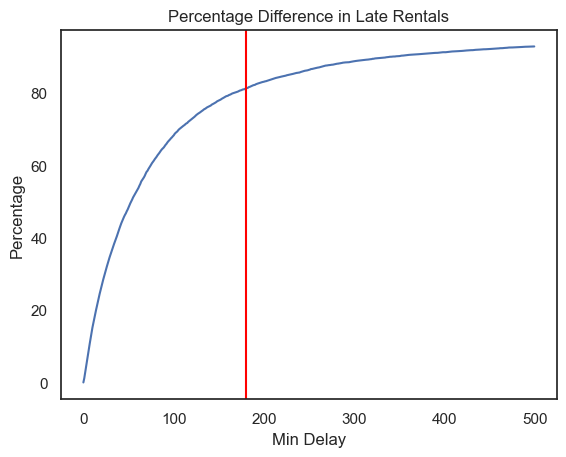

In [48]:
# Conclusion
st.subheader('Conclusion')
st.write('The feature will have a positive impact on the number of late rentals, and the share of late rentals. Now the key element is to find the right delay that will optimise the case, on one hand the delay should be as small as possible to not impact the product, but at the same time it should be implemented in order to improve the issue of late return.')


# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Create a line plot in function of min delay in a range of 0 to 500
y = []
x = []
# Calculate the percentage difference
for i in range(0, 500):
    y_temp = (df_ended[df_ended['delay_at_checkout_in_minutes'] > 0].shape[0] - df_ended[df_ended['delay_at_checkout_in_minutes'] > i].shape[0])/df_ended[df_ended['delay_at_checkout_in_minutes'] > 0].shape[0]*100
    y.append(y_temp)
    x.append(i)

ax.plot(x, y)


# Set the title and labels
ax.set_title('Percentage Difference in Late Rentals')
ax.set_ylabel('Percentage')
ax.set_xlabel('Min Delay')
# vertical line for min delay
ax.axvline( min_delay, color='red')
# Display the plot
plt.show(fig)

